In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import csv

import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("data.csv")
data.head(5)

,Generator,Size,Time Generate,Steps Generate,Solver,Time Solve,Steps Solve,Path,Distance
0,Prims,520,18.870,520,BFS,5.331,164,15,13.0
1,Prims,520,18.870,520,Greedy,3.065,94,15,13.0
2,Prims,520,18.870,520,DFS,15.401,466,15,13.0
3,Prims,352,10.122,352,BFS,10.483,297,35,17.0
4,Prims,352,10.122,352,Greedy,3.047,99,35,17.0


In [3]:
def reset_data():    
    def delete_rows(csv_file, row_indices):
        # Read the CSV file into a list of lists
        with open(csv_file, 'r') as file:
            csv_reader = csv.reader(file)
            data = list(csv_reader)
    
        # Check if all row indices are within the range of the data
        if all(0 <= index < len(data) for index in row_indices):
            # Delete the specified rows
            for index in sorted(row_indices, reverse=True):
                del data[index]
    
            # Write the modified data back to the CSV file
            with open(csv_file, 'w', newline='') as file:
                csv_writer = csv.writer(file)
                csv_writer.writerows(data)
            print(f"Rows {row_indices} deleted successfully.")
        else:
            print(f"Invalid row indices: {row_indices}")
    
    csv_file_path = 'data.csv'
    ls = []
    rows_to_delete = ls
    delete_rows(csv_file_path, rows_to_delete)
    


In [4]:
data.describe()

,Size,Time Generate,Steps Generate,Time Solve,Steps Solve,Path,Distance
count,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000,3506.000000
mean,990.930120,54.476956,1165.638620,26.033889,424.201940,68.104678,18.490302
std,1076.492692,104.101071,1341.639344,56.931948,640.740854,104.004398,14.056399
min,70.000000,1.219000,69.000000,0.023000,1.000000,0.000000,0.000000
25%,234.000000,6.348000,278.000000,2.246500,65.250000,18.000000,8.000000
50%,588.000000,19.344000,689.000000,6.671000,177.000000,38.000000,15.000000
75%,1200.000000,57.978000,1452.000000,22.117500,494.750000,74.000000,25.000000
max,4800.000000,1031.046000,9598.000000,597.951000,4792.000000,1311.000000,93.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Generator       3506 non-null   object 
 1   Size            3506 non-null   int64  
 2   Time Generate   3506 non-null   float64
 3   Steps Generate  3506 non-null   int64  
 4   Solver          3506 non-null   object 
 5   Time Solve      3506 non-null   float64
 6   Steps Solve     3506 non-null   int64  
 7   Path            3506 non-null   int64  
 8   Distance        3506 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 246.6+ KB


In [6]:
filtered = pd.DataFrame(columns=data.columns)
filtered = filtered.drop(columns="Solver")
filtered

for index, row in data.iterrows():
    sub_data = (data[(data["Generator"]==row["Generator"])&(data["Time Generate"]==row["Time Generate"])&(data["Steps Generate"]==row["Steps Generate"])])
    if len(sub_data) == 3:
        filtered_data = [sub_data["Generator"].iloc[0], 
                         sub_data["Size"].iloc[0],
                         sub_data["Time Generate"].iloc[0],
                         sub_data["Steps Generate"].iloc[0], 
                         sub_data["Time Solve"].mean(), 
                         sub_data["Steps Solve"].mean(),
                         sub_data["Path"].mean(),
                         sub_data["Distance"].mean(),
                        ]
        row_exists = any((filtered == filtered_data).all(axis=1))
        if not row_exists:
            filtered = filtered.append(pd.Series(filtered_data, index=filtered.columns), ignore_index=True)

filtered.head(5)

,Generator,Size,Time Generate,Steps Generate,Time Solve,Steps Solve,Path,Distance
0,Prims,520,18.870,520,7.932333,241.333333,15.0,13.0
1,Prims,352,10.122,352,6.487667,195.666667,35.0,17.0
2,Binary,70,1.219,69,0.935667,36.000000,10.0,4.0
3,DFS,80,2.934,158,0.745000,26.666667,2.0,2.0
4,DFS,690,39.963,1378,17.881667,488.666667,132.0,32.0


In [7]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Generator       1156 non-null   object 
 1   Size            1156 non-null   object 
 2   Time Generate   1156 non-null   float64
 3   Steps Generate  1156 non-null   object 
 4   Time Solve      1156 non-null   float64
 5   Steps Solve     1156 non-null   float64
 6   Path            1156 non-null   float64
 7   Distance        1156 non-null   float64
dtypes: float64(5), object(3)
memory usage: 72.4+ KB


In [8]:
filtered["Size"] = filtered["Size"].astype("int")
filtered["Steps Generate"] = filtered["Steps Generate"].astype("float")

In [9]:
filtered.describe()

,Size,Time Generate,Steps Generate,Time Solve,Steps Solve,Path,Distance
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,992.947232,54.774676,1169.576990,26.157928,425.182238,68.311707,18.462803
std,1080.951973,104.619131,1347.575204,49.681935,548.372679,104.450462,14.046657
min,70.000000,1.219000,69.000000,0.024333,1.000000,0.000000,0.000000
25%,234.000000,6.345750,266.750000,2.902250,87.250000,18.000000,8.000000
50%,588.000000,19.361500,690.000000,7.834333,214.333333,38.000000,15.000000
75%,1200.000000,58.040500,1452.000000,25.516333,525.750000,74.000000,25.000000
max,4800.000000,1031.046000,9598.000000,444.808000,4107.666667,1311.000000,93.000000


In [10]:
redundant = (filtered[filtered["Size"] < 200]).sample(n=100, random_state=42).index.to_list()
reduced = filtered.drop(redundant)
print(len(reduced[reduced["Size"] < 200]))

138


In [11]:
filtered = reduced.copy()

In [12]:
data = filtered.copy()

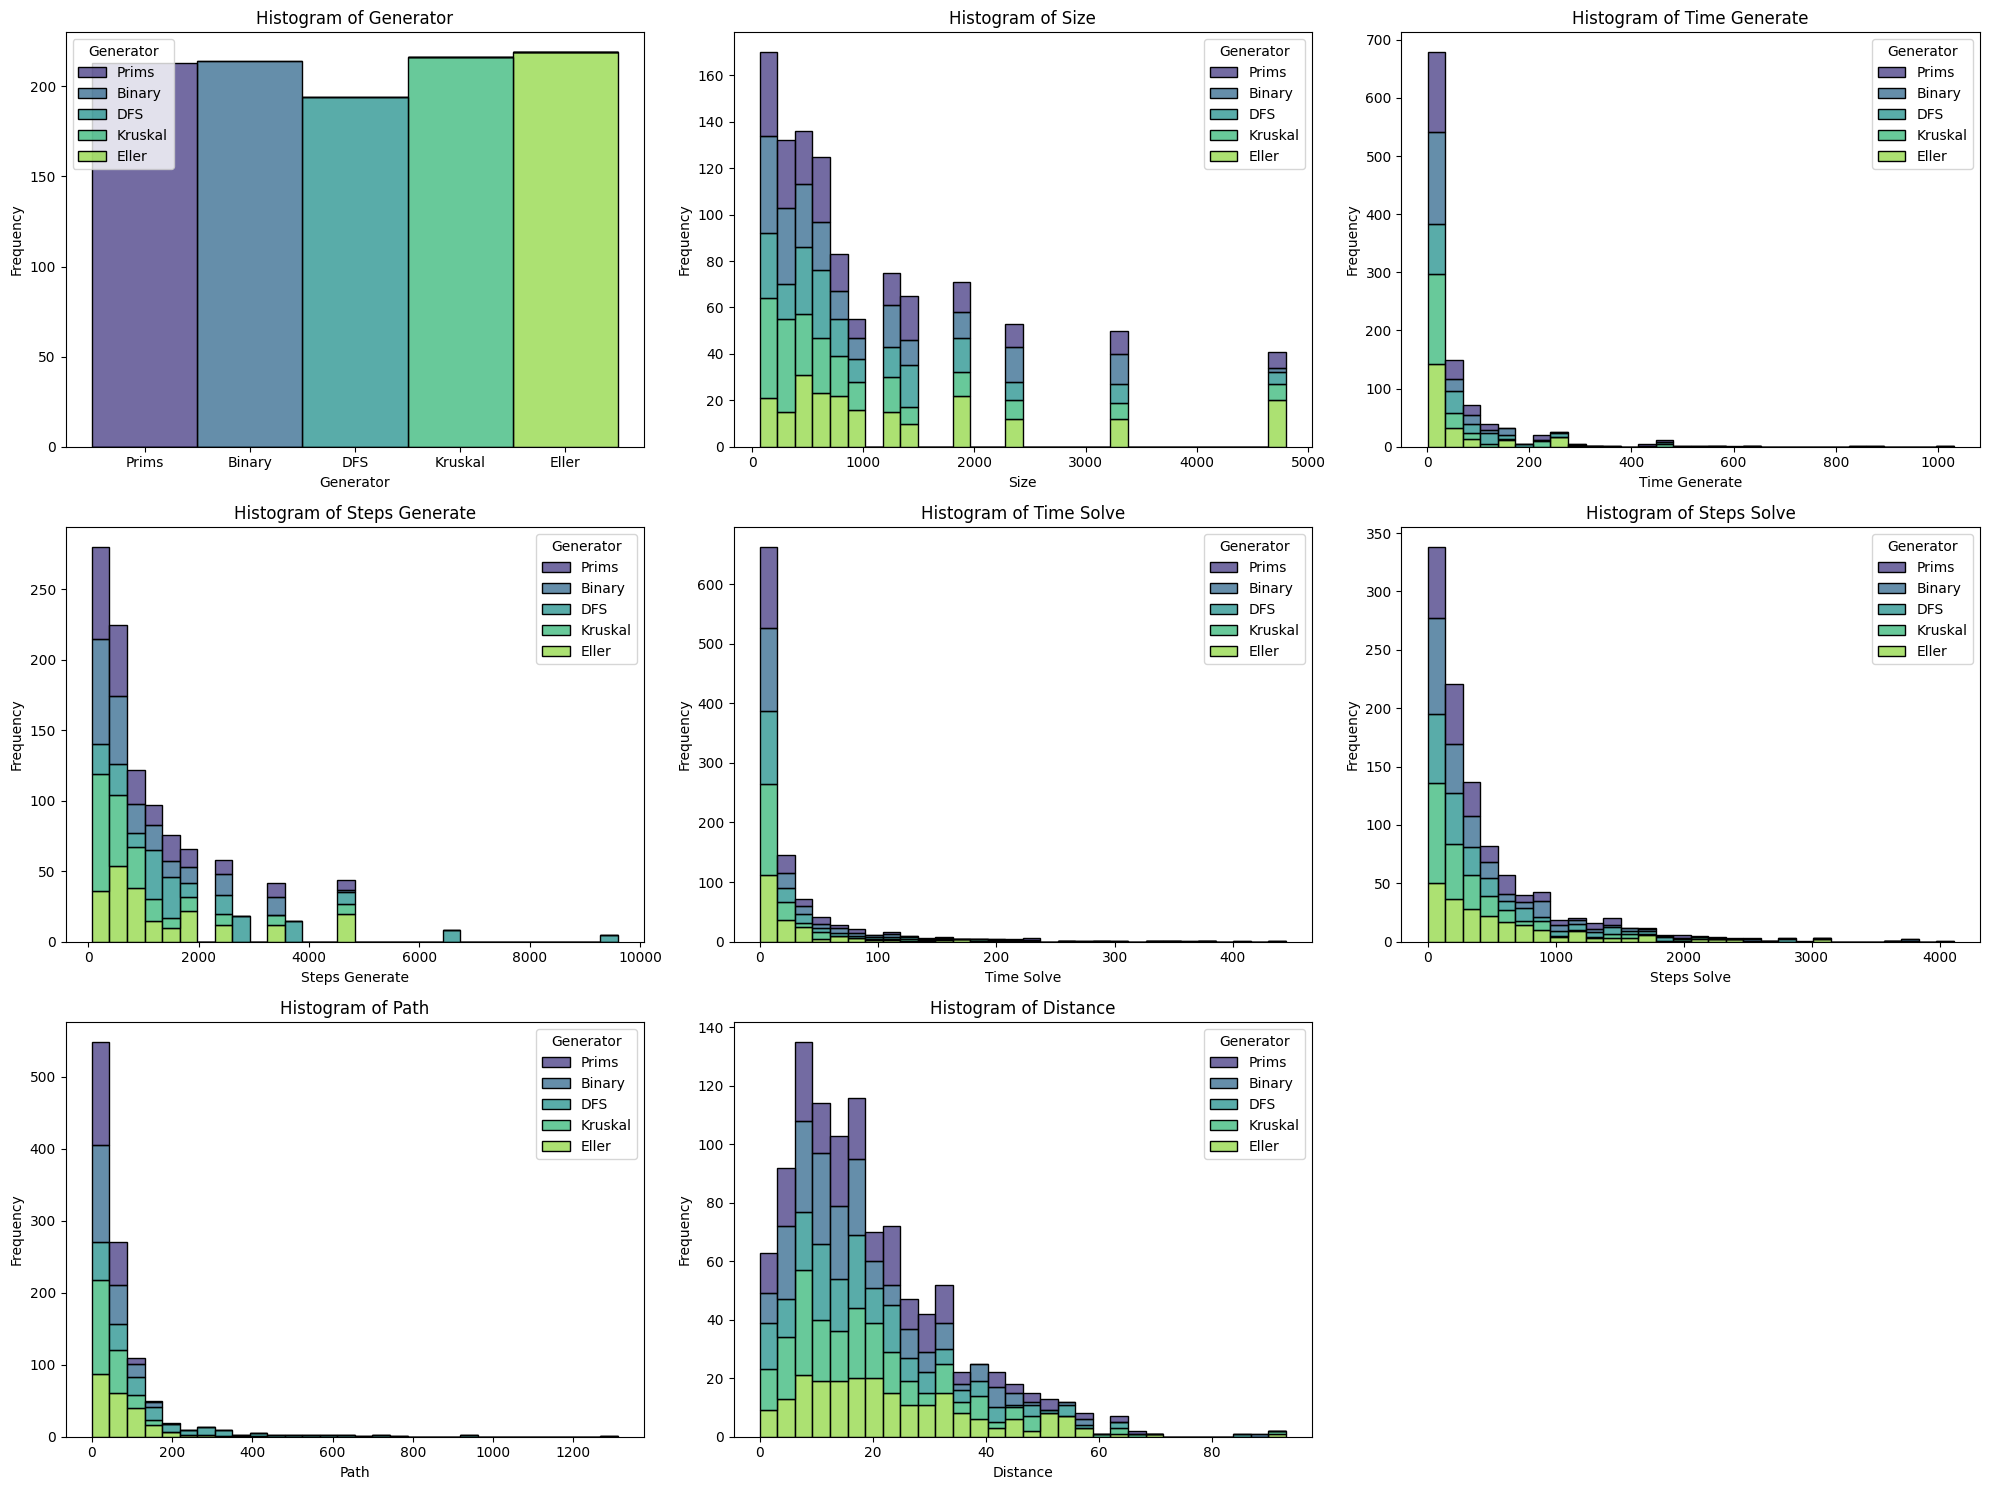

In [13]:
def plot_his(data):
    plt.figure(figsize=(20, 15))
    length = len(data.columns)
    for count, i in enumerate(data.columns):   
        plt.subplot(length//3+1, 3, count+1)
        sns.histplot(data=data, x=i, bins=30, hue='Generator', multiple="stack", palette="viridis")
        plt.xlabel(i)
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {i}")
    
    plt.tight_layout()
    plt.show()

plot_his(data)

In [14]:
generator_data = pd.DataFrame({"Eller" : [], "Kruskal" : [], "Prims" : [], "DFS" : [], "Binary" : []})
generator_data


color = {"Binary": "blue", 
         "Prims": "red", 
         "Eller": "green", 
         "DFS": "brown", 
         "Kruskal": "yellow"}

name = {"Binary" : "Binary Tree",
       "Prims" : "Prim's algorithm",
        "Kruskal" : "Kruskal's algorithm",
        "DFS" : "Recursive backtracker",
        "Eller" : "Eller's algorithm"
       }

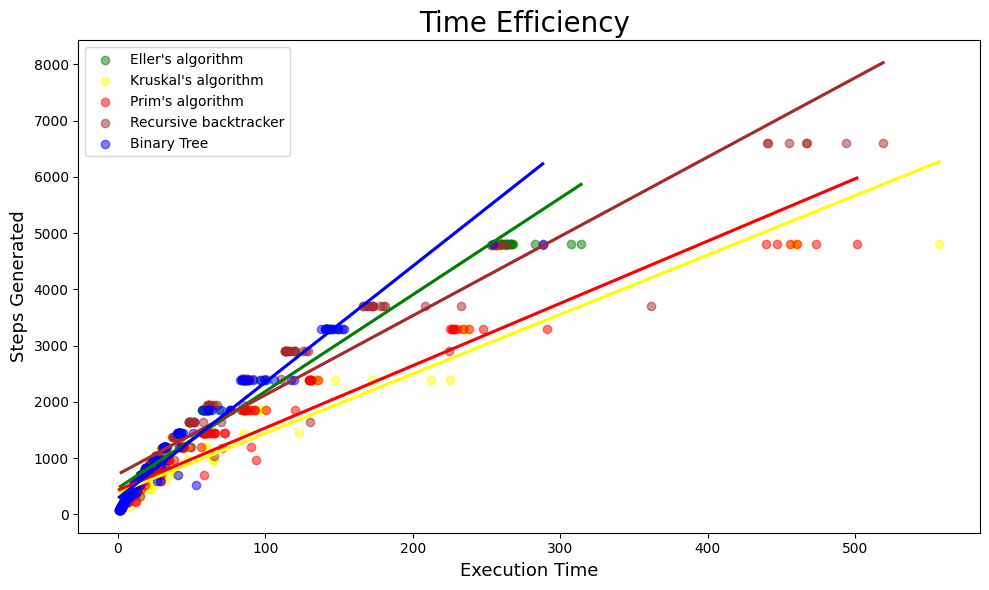

,Eller,Kruskal,Prims,DFS,Binary
TimeEfficiency,17.212388,10.581010,11.088508,14.119247,20.665844
RMSETimeEfficiency,269.581690,281.798208,303.022695,437.081739,221.979920


In [15]:
def plot_AlgoComplex(time_limit = (0, 10000), step_limit = (0, 100000)):
    plt.figure(figsize=(10, 6))
    mean_stepspertime, std_stepspertime = [], []
    length = len(data["Generator"].unique())
    for i in ["Eller", "Kruskal", "Prims", "DFS", "Binary"]:
        generator = data[
        (data["Generator"]==i) & 
        (time_limit[0] < data["Time Generate"]) &
        (data["Time Generate"] < time_limit[1]) & 
        (step_limit[0] < data["Steps Generate"])&
        (data["Steps Generate"] < step_limit[1])
        ]
        x, y = generator['Time Generate'], generator['Steps Generate'] 
        reg_plot = sns.regplot(x=x, y=y, color=color[i], label=f'{name[i]}', ci=None, scatter=True, scatter_kws={'alpha': 0.5})

        slope, intercept = np.polyfit(x, y, 1)        
        y_pred = slope * x + intercept

        residuals = y - y_pred
        mse = np.mean(residuals**2)
        rmse = np.sqrt(mse)

        
        plt.title(f"Time Efficiency ", fontsize=20)
        plt.xlabel("Execution Time", fontsize=13)
        plt.ylabel("Steps Generated", fontsize=13)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    
        generator["StepsPerTimeGenerate"] = generator["Steps Generate"]/generator["Time Generate"]
        mean_stepspertime.append(slope)
        std_stepspertime.append(rmse)
    
    plt.tight_layout()
    plt.legend(fontsize="medium")
    plt.savefig('graphs/Algorithm complexity.jpg', dpi=1500)
    plt.show()
    
    
    generator_data.loc["TimeEfficiency"] = mean_stepspertime
    generator_data.loc["RMSETimeEfficiency"] = std_stepspertime
    

plot_AlgoComplex(time_limit=(0, 600))
generator_data

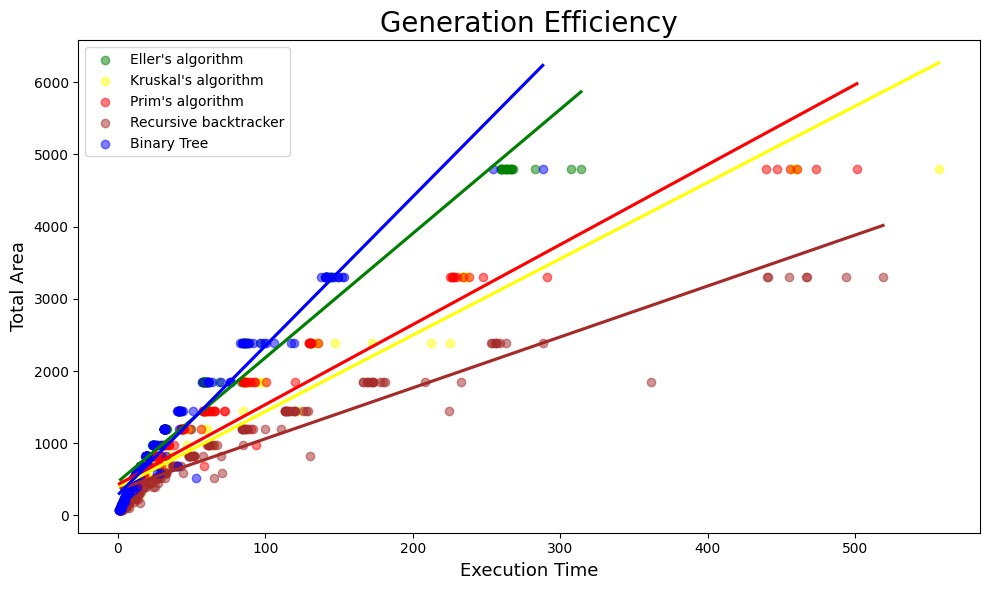

,Eller,Kruskal,Prims,DFS,Binary
TimeEfficiency,17.212388,10.581010,11.088508,14.119247,20.665844
RMSETimeEfficiency,269.581690,281.798208,303.022695,437.081739,221.979920
GenerationEfficiency,17.212388,10.581093,11.088508,7.059623,20.665844
RMSEGenerationEfficiency,269.581690,281.832009,303.022695,218.540869,221.979920


In [16]:
def plot_TimeComplex(size_limit=(0, 10000), time_limit=(0, 1000)):
    plt.figure(figsize=(10, 6))
    mean_sizepertime, std_sizepertime = [], []
    length = len(data["Generator"].unique())
    for i in ["Eller", "Kruskal", "Prims", "DFS", "Binary"]:
        # print(i)
        generator = data[(data["Generator"]==i) & (data["Time Generate"] <= 300)]
        generator = data[
        (data["Generator"]==i) & 
        (time_limit[0] < data["Time Generate"]) &
        (data["Time Generate"] < time_limit[1]) & 
        (size_limit[0] < data["Size"])&
        (data["Size"] < size_limit[1])
        ]
        size = generator["Size"]
        x, y = generator['Time Generate'], size
        sns.regplot(x=x, y=y, color=color[i], label=f'{name[i]}', ci=None, scatter=True, scatter_kws={'alpha': 0.5})

        slope, intercept = np.polyfit(x, y, 1)        
        y_pred = slope * x + intercept

        residuals = y - y_pred
        mse = np.mean(residuals**2)
        rmse = np.sqrt(mse)
    
        plt.title(f"Generation Efficiency", fontsize=20)
        plt.ylabel("Total Area", fontsize=13)
        plt.xlabel("Execution Time", fontsize=13)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    
        mean_sizepertime.append(slope)
        std_sizepertime.append(rmse)
    
    plt.legend(fontsize="medium")
    plt.tight_layout()
    plt.savefig('graphs/Time complexity.jpg', dpi=1500)
    plt.show()
    
    
    generator_data.loc["GenerationEfficiency"] = mean_sizepertime
    generator_data.loc["RMSEGenerationEfficiency"] = std_sizepertime

plot_TimeComplex(time_limit=(0, 600))
generator_data

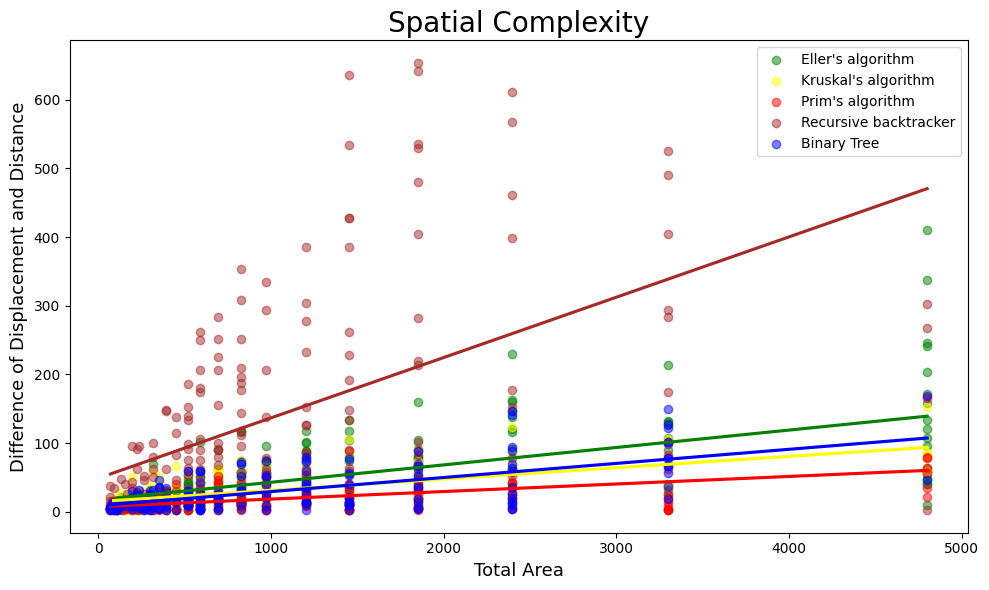

,Eller,Kruskal,Prims,DFS,Binary
TimeEfficiency,17.212388,10.581010,11.088508,14.119247,20.665844
RMSETimeEfficiency,269.581690,281.798208,303.022695,437.081739,221.979920
GenerationEfficiency,17.212388,10.581093,11.088508,7.059623,20.665844
RMSEGenerationEfficiency,269.581690,281.832009,303.022695,218.540869,221.979920
SpatialComplexity,0.025343,0.016454,0.010987,0.087868,0.020534
RMSESpatialComplextity,45.630646,19.865176,17.054526,129.723755,23.449892


In [17]:
import numpy as np

def plot_complexity(size_limit=(0, 10**10), distance_path_limit=(0, 10000)):
    plt.figure(figsize=(10, 6))
    mean_complexity, std_complexity = [], []
    length = len(data["Generator"].unique())
    for i in ["Eller", "Kruskal", "Prims", "DFS", "Binary"]:
        generator = data[
            (data["Generator"]==i) & 
            (size_limit[0] < data["Size"]) &
            (data["Size"] < size_limit[1]) & 
            (distance_path_limit[0] < (data["Path"] - data["Distance"]))&
            ((data["Path"] - data["Distance"]) < distance_path_limit[1])
            ]
        x, y = (generator["Size"]), (generator["Path"] - generator["Distance"])
        sns.regplot(x=x, y=y, color=color[i], label=f'{name[i]}', ci=None, scatter=True, scatter_kws={'alpha': 0.5})

        slope, intercept = np.polyfit(x, y, 1)        
        y_pred = slope * x + intercept

        residuals = y - y_pred
        mse = np.mean(residuals**2)
        rmse = np.sqrt(mse)
        
        plt.xlabel("Total Area", fontsize=13)
        plt.ylabel("Difference of Displacement and Distance", fontsize=13)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    
        plt.title(f"Spatial Complexity", fontsize=20)
        generator["Complexity"] = (generator["Path"]-generator["Distance"])/generator["Size"]
        mean_complexity.append(slope)
        std_complexity.append(rmse)
    
    plt.legend(fontsize="medium")
    plt.tight_layout()
    plt.savefig('graphs/Maze complexity.jpg', dpi=1500)
    plt.show()
    
    
    generator_data.loc["SpatialComplexity"] = mean_complexity
    generator_data.loc["RMSESpatialComplextity"] = std_complexity


plot_complexity(distance_path_limit=(0, 700))
generator_data

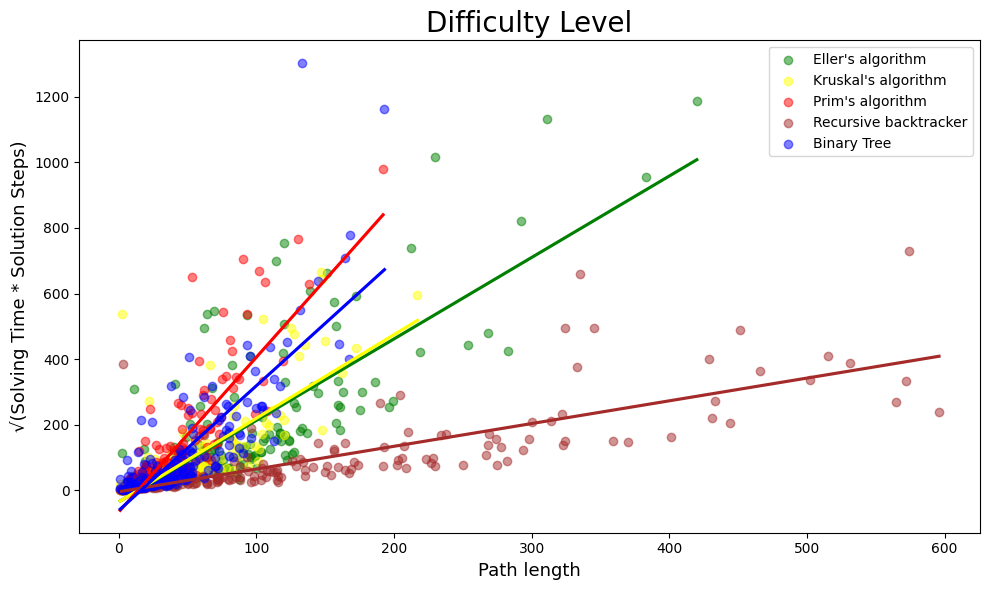

,Eller,Kruskal,Prims,DFS,Binary
TimeEfficiency,17.212388,10.581010,11.088508,14.119247,20.665844
RMSETimeEfficiency,269.581690,281.798208,303.022695,437.081739,221.979920
GenerationEfficiency,17.212388,10.581093,11.088508,7.059623,20.665844
RMSEGenerationEfficiency,269.581690,281.832009,303.022695,218.540869,221.979920
SpatialComplexity,0.025343,0.016454,0.010987,0.087868,0.020534
RMSESpatialComplextity,45.630646,19.865176,17.054526,129.723755,23.449892
DifficultyLevel,2.486188,2.553022,4.723156,0.693999,3.807910
RMSEDifficultyLevel,122.267073,74.832648,80.959055,73.383823,99.602795


In [18]:
import numpy as np

def plot_difficulty(path_limit=(0, 10000), time_limit=(0, 10**10), step_limit=(0, 10**10)):
    plt.figure(figsize=(10, 6))
    mean_difficulty, std_difficulty = [], []
    length = len(data["Generator"].unique())
    for i in ["Eller", "Kruskal", "Prims", "DFS", "Binary"]:
        generator = data[
        (data["Generator"]==i) & 
        (time_limit[0] < data["Time Generate"]) &
        (data["Time Generate"] < time_limit[1]) & 
        (step_limit[0] < data["Steps Generate"])&
        (data["Steps Generate"] < step_limit[1])&
        (path_limit[0] < data["Path"])&
        (data["Path"] < path_limit[1])
        ]
        x, y = generator["Path"], np.sqrt(generator["Time Solve"]*generator["Steps Solve"])
        sns.regplot(x=x, y=y, color=color[i], label=f'{name[i]}', ci=None, scatter=True, scatter_kws={'alpha': 0.5})


        slope, intercept = np.polyfit(x, y, 1)        
        y_pred = slope * x + intercept

        residuals = y - y_pred
        mse = np.mean(residuals**2)
        rmse = np.sqrt(mse)
        
        plt.xlabel("Path length", fontsize=13)
        plt.ylabel("√(Solving Time * Solution Steps)", fontsize=13)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    
        plt.title(f"Difficulty Level", fontsize=20)
        generator["Difficulty"] = np.sqrt(generator["Time Solve"]*generator["Steps Solve"])/generator["Path"]
        mean_difficulty.append(slope)
        std_difficulty.append(rmse)
    
    plt.legend(fontsize='medium')
    plt.tight_layout()
    plt.savefig('graphs/Difficulty.jpg', dpi=1500)
    plt.show()
    
    
    generator_data.loc["DifficultyLevel"] = mean_difficulty
    generator_data.loc["RMSEDifficultyLevel"] = std_difficulty


plot_difficulty(path_limit=(0, 600))
generator_data

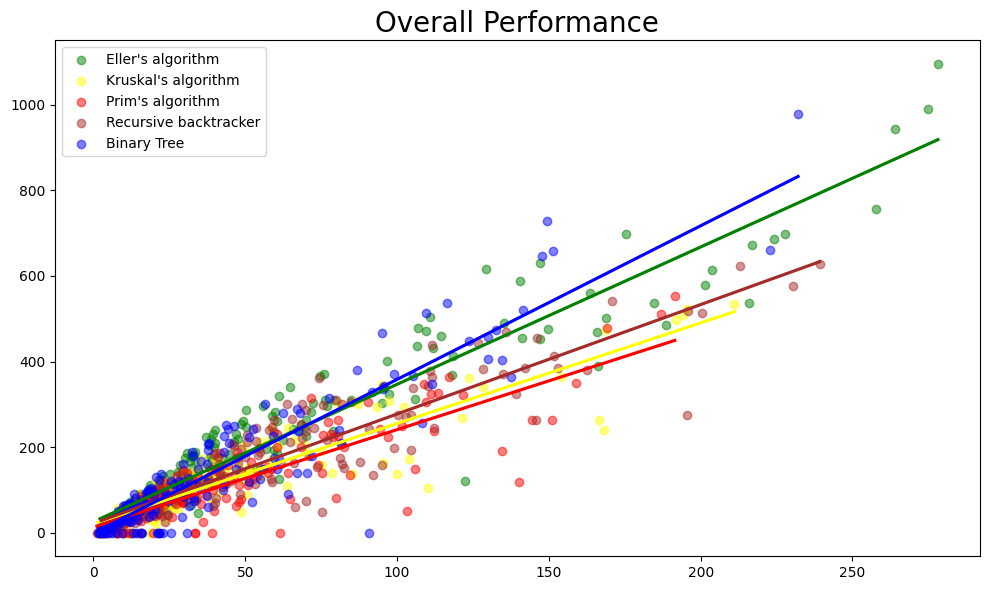

,Eller,Kruskal,Prims,DFS,Binary
TimeEfficiency,17.212388,10.581010,11.088508,14.119247,20.665844
RMSETimeEfficiency,269.581690,281.798208,303.022695,437.081739,221.979920
GenerationEfficiency,17.212388,10.581093,11.088508,7.059623,20.665844
RMSEGenerationEfficiency,269.581690,281.832009,303.022695,218.540869,221.979920
SpatialComplexity,0.025343,0.016454,0.010987,0.087868,0.020534
RMSESpatialComplextity,45.630646,19.865176,17.054526,129.723755,23.449892
DifficultyLevel,2.486188,2.553022,4.723156,0.693999,3.807910
RMSEDifficultyLevel,122.267073,74.832648,80.959055,73.383823,99.602795
Performance,3.207886,2.349558,2.277741,2.555836,3.588407
RMSEPerformance,55.222598,38.223343,44.599926,56.347698,53.366852


In [19]:

plt.figure(figsize=(10, 6))
mean_combination, std_combination = [], []
for i in ["Eller", "Kruskal", "Prims", "DFS", "Binary"]:
    generator = data[(data["Generator"]==i) & ((data["Path"] - data["Distance"]) < 300) & (data["Time Generate"] < 300) & (data["Path"] > 0)]
    generator["Algorithm Complexity"] = generator["Steps Generate"]/generator["Time Generate"]
    generator["Time Complexity"] = generator["Size"]/generator["Time Generate"]
    generator["Complexity"] = (generator["Path"]-generator["Distance"])/generator["Size"]
    generator["Difficulty"] = np.sqrt(generator["Time Solve"]*generator["Steps Solve"])/generator["Path"]
    y_axis = (generator["Steps Generate"] * (generator["Path"]-generator["Distance"]) * np.sqrt(generator["Time Solve"]*generator["Steps Solve"]))**(1/3)
    x_axis = (generator["Time Generate"] * generator["Time Generate"]* generator["Path"])**(1/3)
    generator["Combination"] = y_axis/x_axis #generator["Algorithm Complexity"] * generator["Time Complexity"] * generator["Complexity"] * generator["Difficulty"]

    x, y = x_axis, y_axis
    sns.regplot(x= x, y= y, color=color[i], label=f'{name[i]}', ci=None, scatter=True, scatter_kws={'alpha': 0.5})

    slope, intercept = np.polyfit(x, y, 1)        
    y_pred = slope * x + intercept

    residuals = y - y_pred
    mse = np.mean(residuals**2)
    rmse = np.sqrt(mse)

    plt.title(f"Overall Performance", fontsize=20)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    mean_combination.append(slope)
    std_combination.append(rmse)

plt.legend(fontsize="medium")
plt.tight_layout()
plt.savefig('graphs/Combination.jpg', dpi=1500)
plt.show()

generator_data.loc["Performance"] = mean_combination
generator_data.loc["RMSEPerformance"] = std_combination

generator_data

<Figure size 1000x600 with 0 Axes>

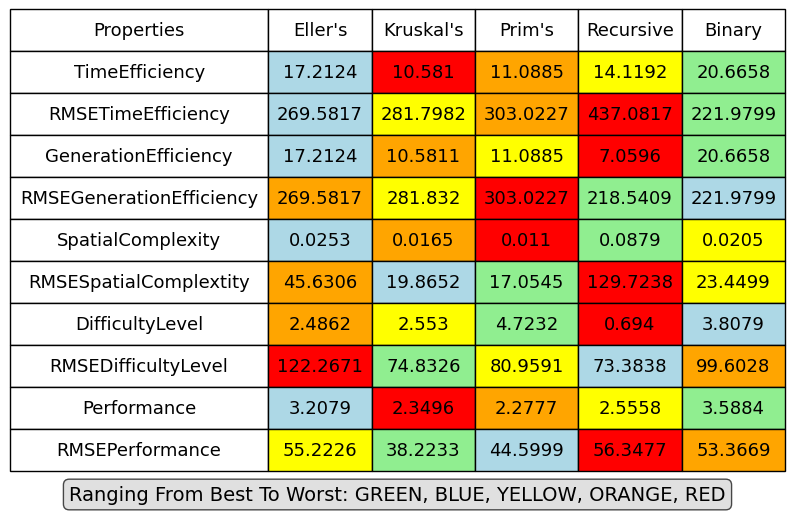

In [20]:
def plot_table(data):
    data.rename(columns={"DFS" : "Recursive", "Prims" : "Prim's", "Eller" : "Eller's", "Kruskal" : "Kruskal's"}, inplace=True)

    plt.figure(figsize=(10, 6))
    fig, ax = plt.subplots(figsize=(10, 6))
    for index, row in data.iterrows():
        for i in row.index:
            data.loc[index, i] = round(data.loc[index, i], 4)
    data["Properties"] = data.index
    data = data[["Properties"] + [col for col in data.columns if col != "Properties"]]
    table = ax.table(cellText=data.values, colLabels=data.columns, loc='center', cellLoc='center', 
                      colWidths=[0.5, 0.2, 0.2, 0.2, 0.2, 0.2], bbox=[0, 0, 1, 1],
                     cellColours=[['white', 'lightblue', 'red', 'orange', 'yellow', 'lightgreen']]+
                                 [['white', 'lightblue', 'yellow', 'orange', 'red', 'lightgreen']]+
                                 [['white', 'lightblue', 'orange', 'yellow', 'red', 'lightgreen']]+
                                 [['white', 'orange', 'yellow', 'red', 'lightgreen', 'lightblue']]+
                                 [['white', 'lightblue', 'orange', 'red', 'lightgreen', 'yellow']]+
                                 [['white', 'orange', 'lightblue', 'lightgreen', 'red', 'yellow']]+
                                 [['white', 'orange', 'yellow', 'lightgreen', 'red', 'lightblue']]+
                                 [['white', 'red', 'lightgreen', 'yellow', 'lightblue', 'orange']]+
                                 [['white', 'lightblue', 'red', 'orange', 'yellow', 'lightgreen']]+
                                 [['white', 'yellow', 'lightgreen', 'lightblue', 'red', 'orange']]
                     )
    
    plt.axis('off')
    
    table.auto_set_font_size(False)
    table.set_fontsize(13)

    legend_text = "Ranging From Best To Worst: GREEN, BLUE, YELLOW, ORANGE, RED"
    ax.text(0.5, -0.05, legend_text, ha='center', va='center', transform=ax.transAxes, fontsize=14, 
            bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.7))
    
    plt.savefig('graphs/CompareTable.jpg', dpi=1500)
    
    plt.show()

plot_table(generator_data.copy())